In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Analise de Dados

Neste momento iremos importar os dados e fazer uma analise exploratoria desses, os atributos se referem a:

Os atributos relacionados aos hábitos alimentares são: Consumo frequente de alimentos com alto teor calórico (CAVC), Frequência de consumo de hortaliças (FCVC), Número de refeições principais (NCP), Consumo de alimentos entre as refeições (CAEC), Consumo de água diariamente (CH20 ) e Consumo de álcool (CALC). Os atributos relacionados à condição física são: Monitoramento do consumo de calorias (CCS), Frequência de atividade física (FAF), Tempo de uso de dispositivos tecnológicos (TUE), Transporte utilizado (MTRANS)

## Exploração dos Dados de Treino

In [2]:
df = pd.read_csv('../../playground-series-s4e2/train.csv')
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


Verificaremos agora, o número de nulos, que como observado não possui. caso tivessemos observado algum nulo precisariamos analisar o que deveremos fazer com esse dado. Além disso, observaremos as estatistica correspondentes de cada coluna

In [3]:
df.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

### Valores Númericos

In [4]:
number = df.select_dtypes(include=np.number)
number['ICM'] = number['Weight'] / (number['Height']**2)
number.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,ICM
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756,30.241842
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113,8.333932
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,12.868541
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000,24.088223
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887,29.384757
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000,37.011168
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000,54.997991


Observamos que temos 13840 registros. Como o risco de obesidade é um valor categorico, adicionamos o calculo do icm, no qual o risco de obesidade foi categorizado. Segundo o artigo referencia da base de dados. <a>https://www.sciencedirect.com/science/article/pii/S2352340919306985 </a>

* Abaixo do peso Menos de 18,5

* Normal 18,5 a 24,9

* Excesso de peso 25,0 a 29,9

* Obesidade I 30,0 a 34,9

* Obesidade II 35,0 a 39,9

* Obesidade III Superior a 40


Além disso, achamos interessante que 75% das pessoas na base de dados possuem até 26 anos, Da mesma forma que 75% possuem mais de 1.60 de altura.

Enquanto ao consumo de hortaliças(FCVC) não parece haver uma disparidade mutio grande dentro da distribuições. 

Já ao número de refeições principais(NCP), observamos que dentro de cada quartil a divisão está dentro das 3 refeições, todavia dentro do primeiro quartil há pessoas que só alimentam uma vez no dia, e do ultimo quartil pessoas quem tem 4 refeições principais, acreditamos que pode estar relacionado a desnutrição e a obsidade como primeira impressão.

Já enquanto ao consumo de água(CH2O), observamos que 25% das pessoas não chegam a beber 2 litros de água, a ponto que a mediana é os proprios 2 litros o que costuma ser recomendado acima dos 14 anos. A quantidade maxíma de água ingerida diáriamente é de 3 litros, todavia o peso máximo é de 165 quilos, que deveria beber em torno de 5 litros de água.

A frequência de atividades fisicas(FAF) observamos que 25% da base praticamente não pratica atividade fisica alguma, e metade de toda a base só pratica provavelmente 1 vez na semana, o que é um valor muito baixo.

O tempo usandoa dispositivos eletronicos ( TUE), 25% da base de dados não tem esse tempo registrado de forma relevante. Os maiores valores se localizam acima de 75% da distribuição 

O curioso é que até 25% da distribuição está com o peso normal, entre o primeiro quartil e a mediana possuem gente com peso normal e em excesso de peso, todavia a mediana é praticamente o limite do icm para excesso de peso, e os individuos acima já estão com um certo grau de obsedidade




#### Violiplot

Para vermos a distribuiçãos desses dos dados, elaboramos o gráfico de violinplot sobreposto ao boxplot, onde podemos ver a distribuição e a densidade dos dados

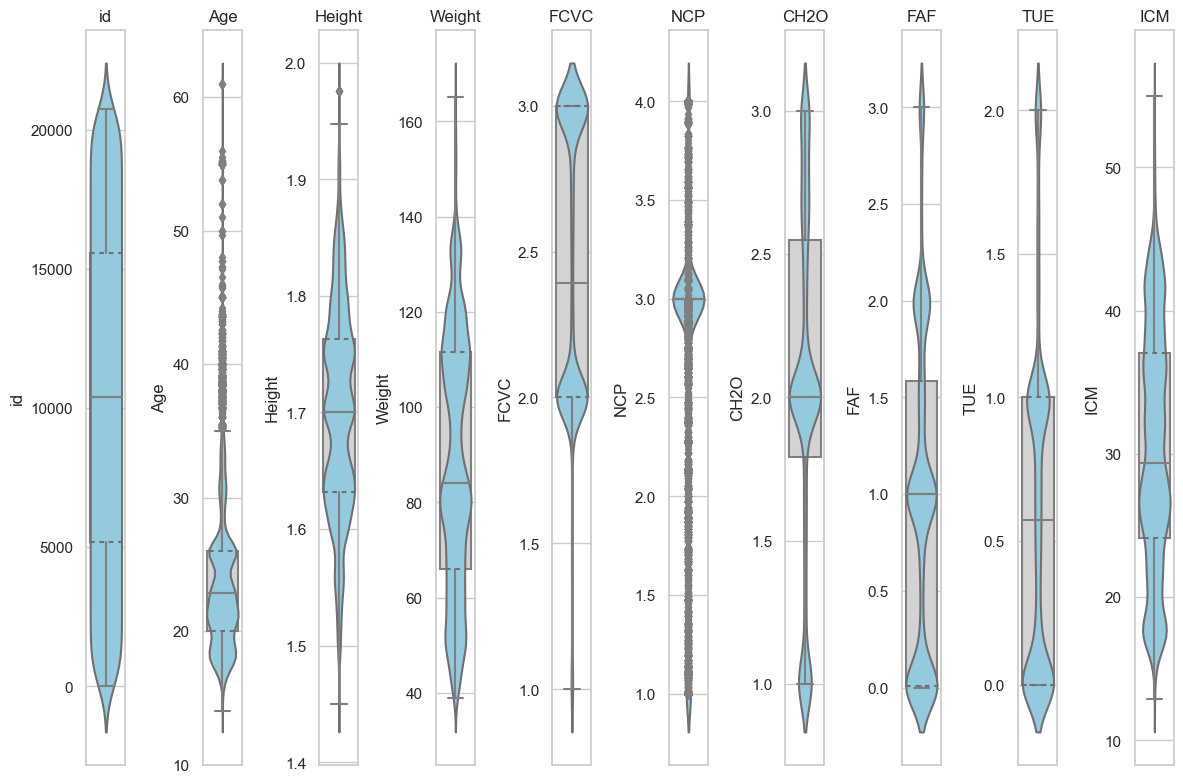

In [5]:
sns.set_theme(style="whitegrid")

# Criar uma única figura com múltiplos subplots
plt.figure(figsize=(12, 8))

# Loop sobre as colunas numéricas do DataFrame e plotar boxplots e violinos sobrepostos
for i, coluna in enumerate(number.columns):
    plt.subplot(1, len(number.columns), i+1)
    
    # Boxplot
    sns.boxplot(y=number[coluna], color='lightgray')
    
    # Violino sobreposto
    sns.violinplot(y=number[coluna], inner='quartile', color='skyblue', alpha=0.6)
    
    plt.title(coluna)

# Ajustar o layout para evitar sobreposição de rótulos
plt.tight_layout()

# Exibir a figura
plt.show()

O que pode ser observado, dentro da idade a concentração conforme já esperavamosdentro da faixa de 20 anos. A altura possui uma densidade alta entre o primeiro e o ultimo quartil. Quanto ao peso observamos que dentre os 50% e o 75% da distribuição, não possui uma densidade expressiva.

Agora o consumo de hortaliças, observamos que tem uma quatidade expressiva em torno do valor 2, o que não era esperado, que está ao redor do primeiro quartil, diferente da densidade de dados expressivas ao redor de 3.

A quantindade de refeições diárias se tornou uma surpresa de certa forma, nós temos a formação do gráfico de violino, mas não temos a caixa. Mas conforme a analise das estaticas os dados estão proxímos de 3 refeições diárias, todavia existe uma discrepancia na forma como os dados estão distribuidos, mostrando que boa parte das pessoas não tem na realidade refeições principais regulares. O que nos levar a pensar que talvez a obesidade não esteja relacionado somente ao alto número de refeições mas também a irregularidade dessas ou isso é alguma falha dos dados sintéticos

O consumo de água, observamos que existe muito dado ao redor da mediana de provaveis 2 litros. Todavia acima da mediana não há essa densidade, embora a mediana do peso seja de quase 84 quilos. A impressão é que as pessoas com maior peso, não bebem tanta água como deveriam.

Em relaçaõ a prática de atividades físicas, observamos muita densidade ao redor do 0 e do 1, enquanto o número de 2 e 3 já estão juntos dentro do ultimo quartil da distribuição.

E o tempo de uso de disposivos eletrônicos, é interessante porque existe uma densidade significativa ao redor do 0, e a mediada está 0.5. Mostrando que praticamente metade da amostra não usa muito dispositivos eletrônicos

Conforme analisado, tem uma expressiva quantidade de dados entre o primeiro quartil e a mediana, ou seja entre o peso normal e excesso de peso.Todavia acima do sobrepeso, o número de obesos se distribuem de forma uniforme acima da mediana



#### Gráfico de Dispersão com reta de regressão


Vamos analisar a dispersão desses dados, primeiro gerando um coeficiente de correlação

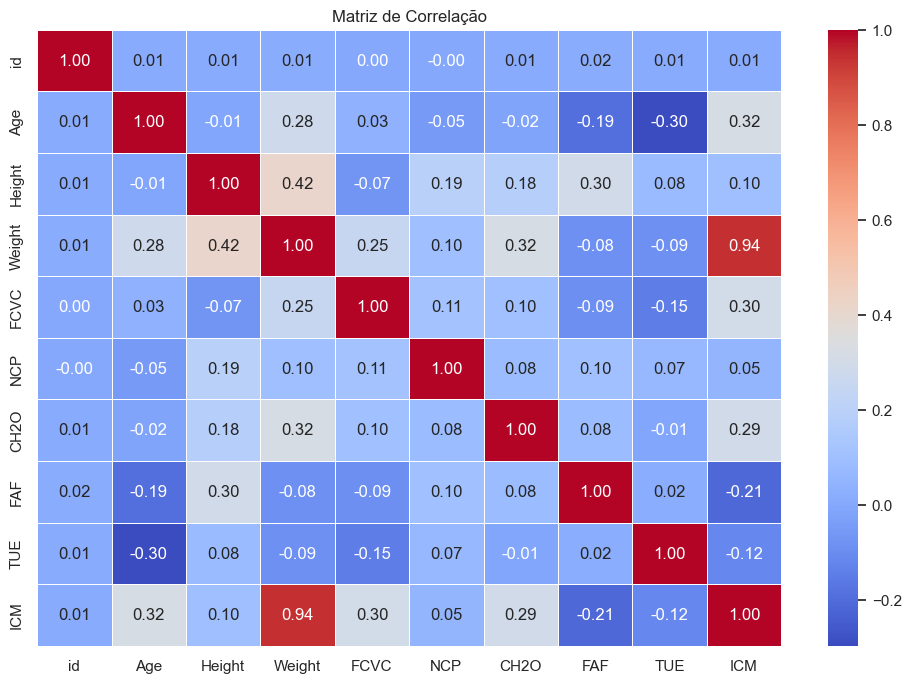

In [6]:
matriz_correlacao = number.corr()

# Criação do mapa de calor com seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Adiciona título
plt.title('Matriz de Correlação')

# Exibe o gráfico
plt.show()

O peso é praticamente o Indice de Massa corporea, o indice é o alvo antes de ser categorizado. A presença da variavel pode causar instabilidade do modelo, vamos fazer um modelo com o peso e um sem o peso.

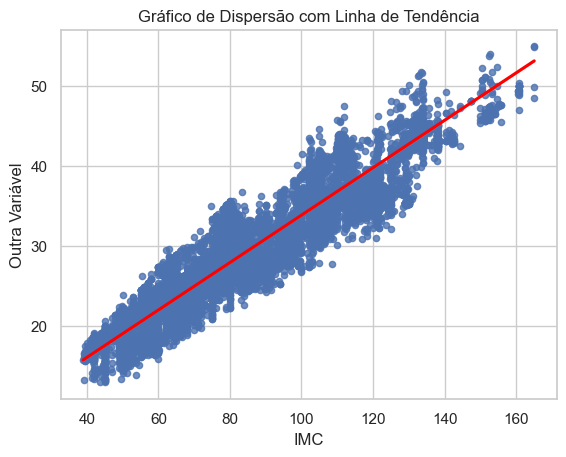

In [7]:
sns.regplot(x='Weight', y='ICM', data=number, scatter_kws={'s': 20}, line_kws={'color': 'red'})
plt.title('Gráfico de Dispersão com Linha de Tendência')
plt.xlabel('IMC')
plt.ylabel('Outra Variável')

# Mostrando o gráfico
plt.show()


### Valores Categoricos

Para esses valores, temos os gêneros que são homem e mulher, o histórico de obesidade familiar, a frequência do consumo de comidas da altas calorias, o CAEC que é o consumo de comidas entre refeições, se é fumante ou não, a frequência do consumo de alcool, o meio de transporte mais utilizado

In [9]:
letters = df.select_dtypes(include=np.object_)
letters.describe()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,20758,20758,20758,20758,20758,20758,20758,20758,20758
unique,2,2,2,4,2,2,3,5,7
top,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
freq,10422,17014,18982,17529,20513,20071,15066,16687,4046


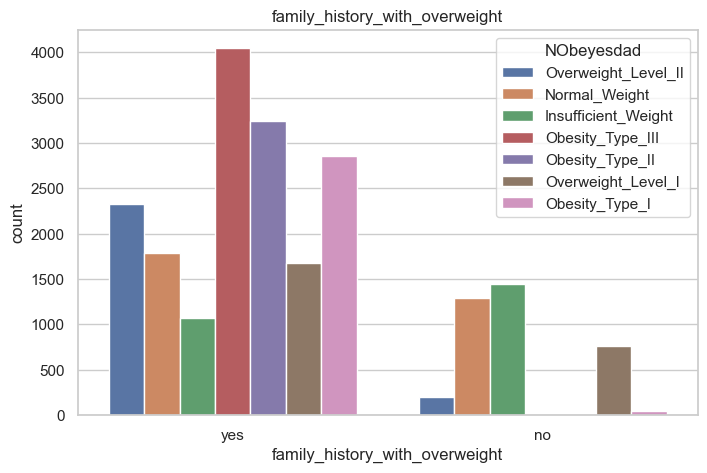

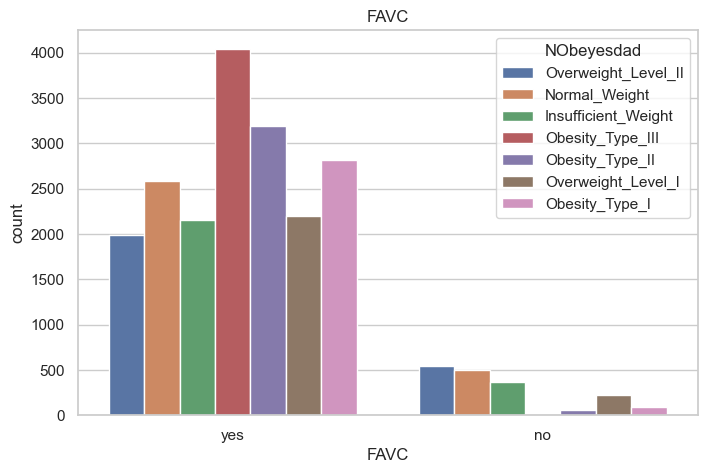

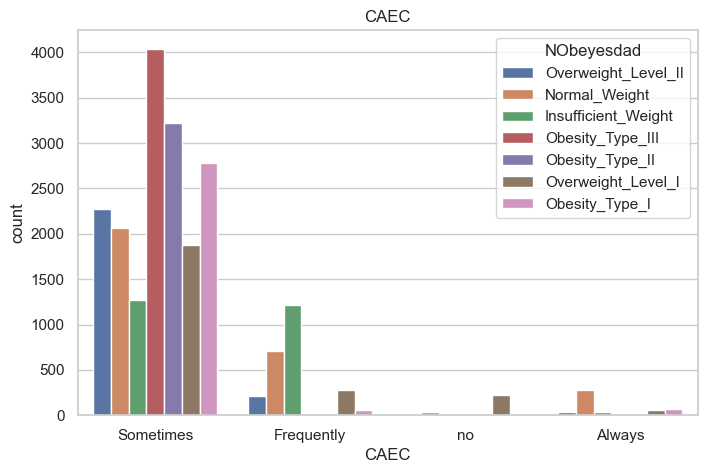

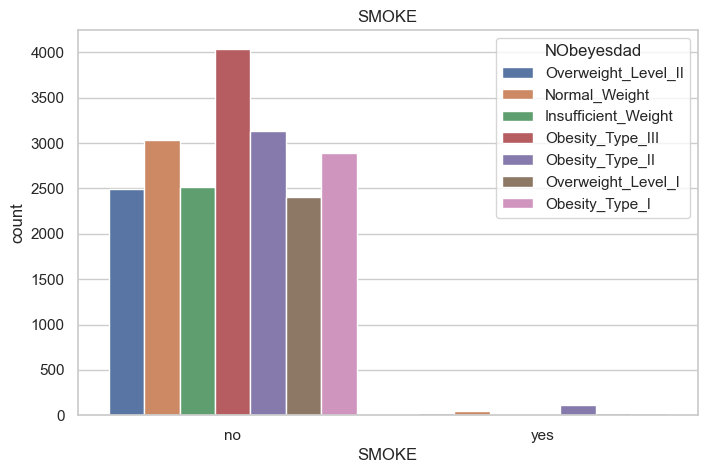

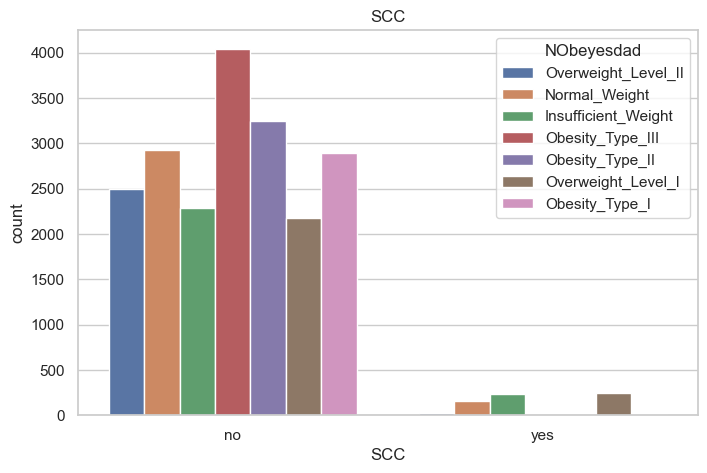

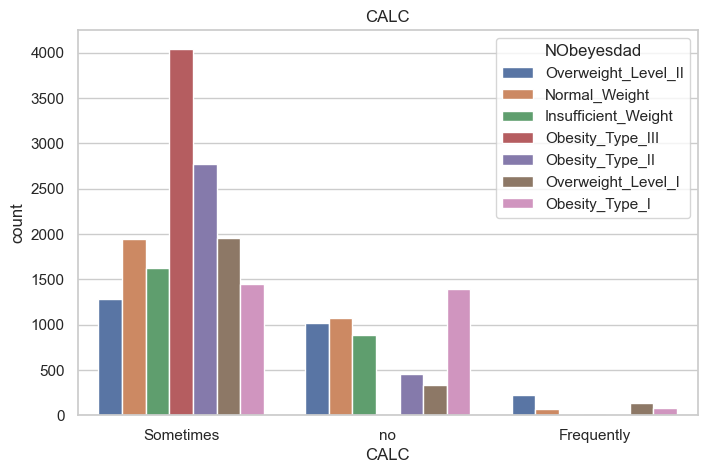

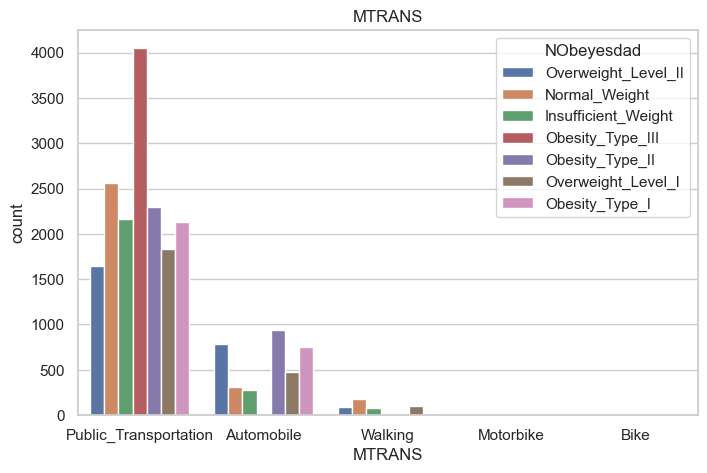

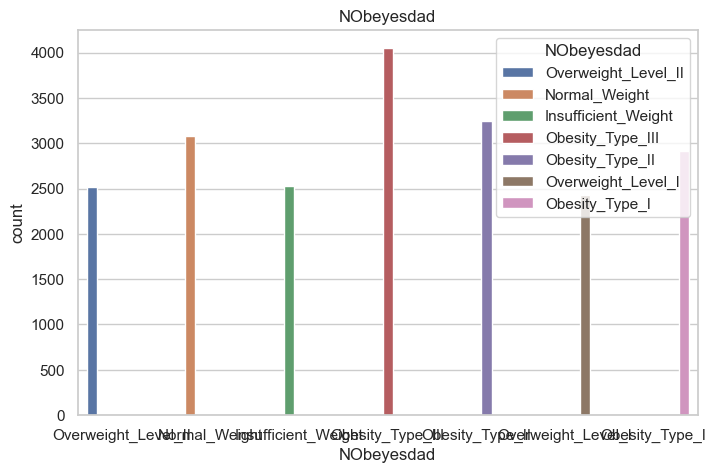

In [10]:
sns.set_theme(style="whitegrid")

# Itere sobre as colunas e crie um gráfico de barras empilhadas para cada uma
for coluna in letters.columns[1:]:  # Começando a partir da segunda coluna
    plt.figure(figsize=(8, 5))
    sns.countplot(x=coluna, hue='NObeyesdad', data=letters)
    plt.title(coluna)
    plt.show()

Observamos que quem tem histórico familiar de obesidade, tende a ter a obsedidade, enquanto os que não mal chegam a ser obesos, no máximo um sobrepeso.

Observamos que as pessoas quem tem os maiores graus de obesidade são os que mais consumem comida de alta calorias, todavia seguido das obesidades vem as pessoas com peso normal. Todavia os maiores grau de obesidade tem uma diferença significativa na contagem em relação as pessoas com peso normal.

Enquanto ao consumo de comida entre as refeições observamos que praticamente todos comem alguma coisa entre as refeições.

E todos na base de dados praticamente não fumam, independende da condição corporal, no geral quem respondeu o questionário não monitora o consumo de calorias. enquanto muitos consomem alcool algumas vezes. A maioria das pessoasa na base de dados no geral usa como o principal meio de transporte público.



## Exploração dos dados de teste

In [12]:
test_df = pd.read_csv("../../playground-series-s4e2/test.csv")
test_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [15]:
test_number = test_df.select_dtypes(include=np.number)
test_number.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000
mean,27677.500000,23.952740,1.698934,87.384504,2.442898,2.750610,2.032044,0.974532,0.611033
std,3995.408198,5.799814,0.088761,26.111819,0.531606,0.710927,0.611230,0.840361,0.608005
min,20758.000000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,24217.750000,20.000000,1.631662,65.000000,2.000000,3.000000,1.771781,0.001086,0.000000
50%,27677.500000,22.906342,1.700000,83.952968,2.358087,3.000000,2.000000,1.000000,0.552498
75%,31137.250000,26.000000,1.760710,111.157811,3.000000,3.000000,2.552388,1.571865,1.000000
max,34597.000000,61.000000,1.980000,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


As modificações das estatisticas dos dados de treinos para os dados testes númericos não são difentes, basicamente possuem a mesma configuração.

In [16]:
test_letters = test_df.select_dtypes(include=np.object_)
test_letters.head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
0,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
1,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
2,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
3,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
4,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation


In [17]:
test_letters.describe()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
count,13840,13840,13840,13840,13840,13840,13840,13840
unique,2,2,2,4,2,2,4,5
top,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
freq,6965,11384,12583,11689,13660,13376,9979,11111


Os dados inicialmente pela descrição estatistica apresentam uma variação do tipo unique em CALC, vamos analisar em um gráfico de barras analisando as frequências dos dados, como não temos a variavel alvo, associaremos ao gênero das pessoas representadas no gráfico para analise.

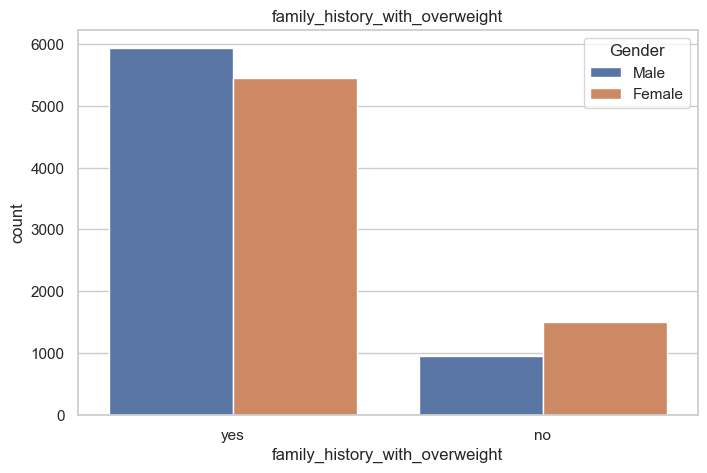

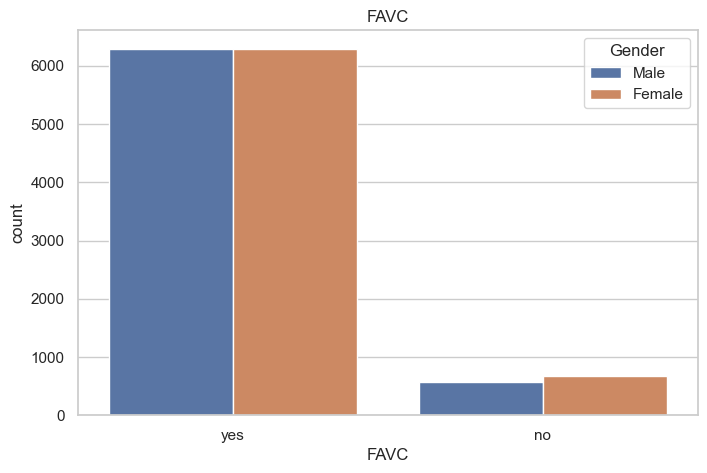

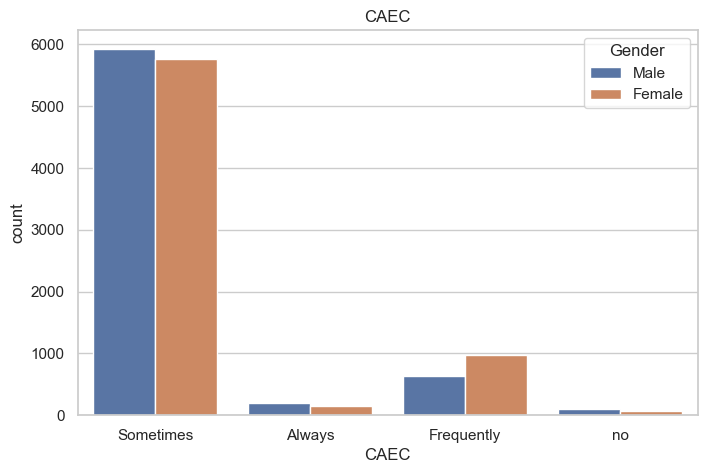

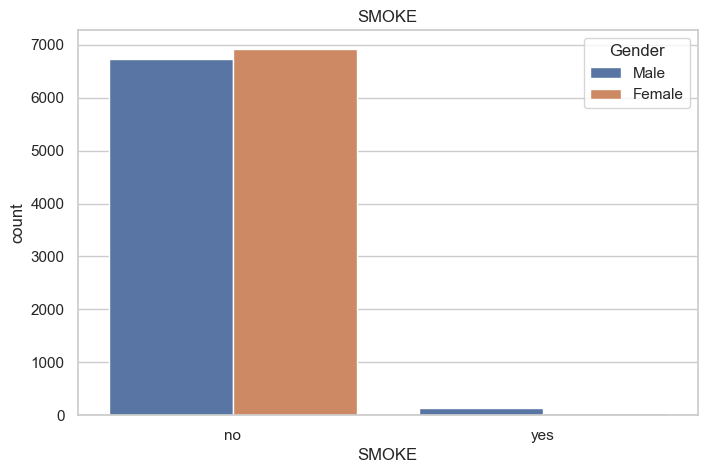

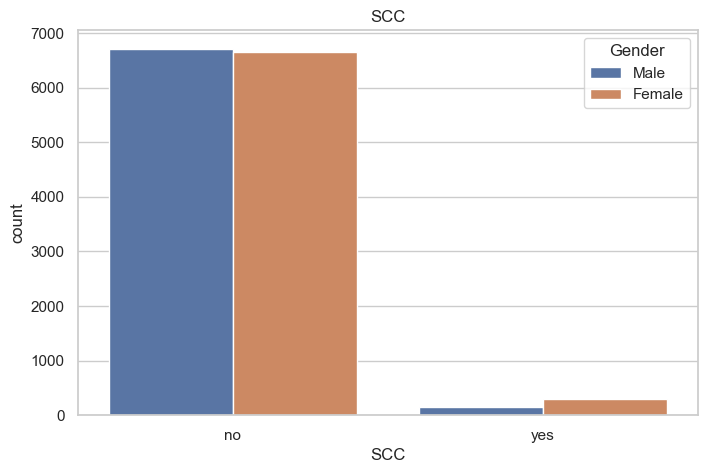

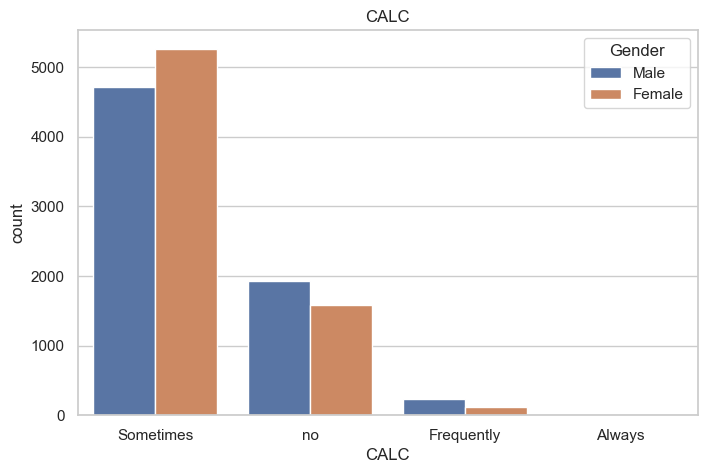

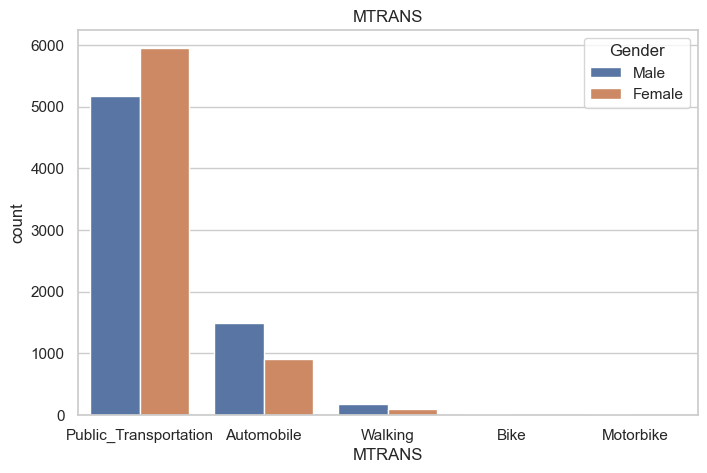

In [22]:
sns.set_theme(style="whitegrid")

# Itere sobre as colunas e crie um gráfico de barras empilhadas para cada uma
for coluna in test_letters.columns[1:]:  # Começando a partir da segunda coluna
    plt.figure(figsize=(8, 5))
    sns.countplot(x=coluna, hue='Gender', data=test_letters)
    plt.title(coluna)
    plt.show()

Encontramos a preseneça do valor Always, que antes não existia na base de dados